In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_data, shift_gal, peak_detection, draw_images
import cosmos_params
import plot

***
**Note:**

Images simulated in this notebook are drawn supposing a number of exposures corresponding to the **full LSST and Euclid surveys**. There is just one PSF applied on the stack.

If you want to generate images for one single exposure, go to the file `cosmos_param.py` and change the `full_or_single` parameter to `'single'`.

***

**Fix parameters**

Data folder and which part of the catalog is used

In [3]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
data_dir = str(os.environ.get('IMGEN_DATA'))
cosmos_cat_dir = os.path.join(data_dir,'COSMOS_25.2_training_sample')

# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [4]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [5]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [6]:
res[2]

{'e1_fit_0': -0.27083658752383855,
 'e2_fit_0': -0.09045478981779075,
 'weight_fit_0': 325.99924848029036,
 'redshift_0': 1.8001999855041504,
 'moment_sigma_0': 2.054461717605591,
 'e1_ksb_0': -0.09023255854845047,
 'e2_ksb_0': -0.7670783400535583,
 'mag_0': 27.167577966751814,
 'nb_blended_gal': 1,
 'mag': 27.167577966751814,
 'mag_ir': -2.6113974672150313,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 27.493796696237666,
 'SNR_peak': 0.03008780876390737}

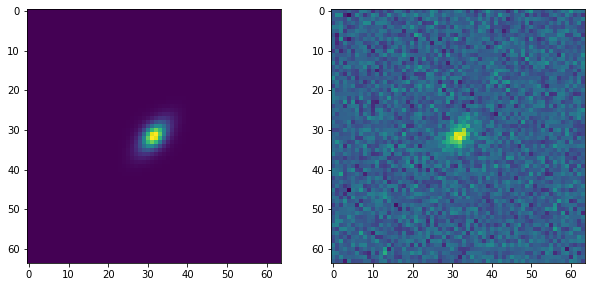

In [7]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [8]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [9]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [10]:
res[2]

{'e1_fit_0': -0.7331456092106455,
 'e2_fit_0': -0.5301807427694271,
 'weight_fit_0': 256.7090390836482,
 'e1_fit_1': 0.10427309683998778,
 'e2_fit_1': 0.5170678418696094,
 'weight_fit_1': 485.2768459455589,
 'e1_fit_2': -0.08522942300412052,
 'e2_fit_2': 0.3492332934799782,
 'weight_fit_2': 448.9524572455263,
 'e1_fit_3': 0.5485188480315537,
 'e2_fit_3': -0.4864032038915901,
 'weight_fit_3': 310.6165817642157,
 'e1_fit_4': -0.061345978451708395,
 'e2_fit_4': 0.18361421597607097,
 'weight_fit_4': 470.7105157719595,
 'e1_fit_5': 0.4731797819284158,
 'e2_fit_5': -0.575607648136936,
 'weight_fit_5': 516.254011911033,
 'redshift_0': 0.9355000257492065,
 'moment_sigma_0': 2.3289198875427246,
 'e1_ksb_0': 0.4354861080646515,
 'e2_ksb_0': -0.29482004046440125,
 'mag_0': 25.953836604355587,
 'redshift_1': 0.20190000534057617,
 'moment_sigma_1': 1.7974770069122314,
 'e1_ksb_1': 0.3551621735095978,
 'e2_ksb_1': 0.15332919359207153,
 'mag_1': 26.943885389624935,
 'redshift_2': 0.6572999954223633,


Display noiseless brightest galaxy and blend images

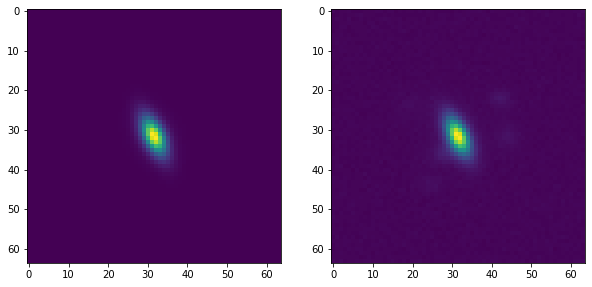

In [11]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

Display all noiseless galaxies

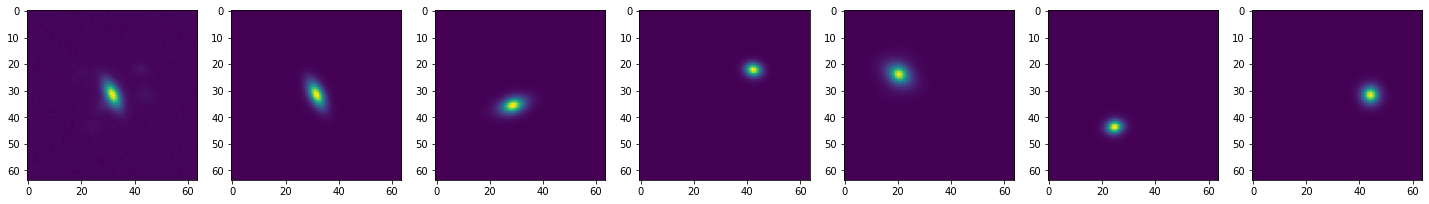

In [12]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Now if I want an image with a variable number of galaxies, say between 2 and 5, I need to set the `nmax_blend` parameter to (2,5).

In [13]:
nmax_blend = (2,5) # Give an interval to sample the number of galaxies to add in this interval

In [14]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [15]:
res[2]

{'e1_fit_0': -0.07189135762581064,
 'e2_fit_0': -0.1461965400547561,
 'weight_fit_0': 535.6804603422113,
 'e1_fit_1': -0.3269417228287206,
 'e2_fit_1': -0.0018569693024099374,
 'weight_fit_1': 427.19397681986857,
 'e1_fit_2': 0.3289275276775891,
 'e2_fit_2': 0.6453609502014971,
 'weight_fit_2': 226.2583967843849,
 'e1_fit_3': -0.08478497650640952,
 'e2_fit_3': -0.21349606744831803,
 'weight_fit_3': 316.8264295348749,
 'e1_fit_4': nan,
 'e2_fit_4': nan,
 'weight_fit_4': nan,
 'redshift_0': 0.9595999717712402,
 'moment_sigma_0': 1.9167747497558594,
 'e1_ksb_0': 0.4032045006752014,
 'e2_ksb_0': 0.07514093071222305,
 'mag_0': 26.783263513978863,
 'redshift_1': 0.1429000049829483,
 'moment_sigma_1': 1.8840904235839844,
 'e1_ksb_1': 0.0027839187532663345,
 'e2_ksb_1': 0.19406400620937347,
 'mag_1': 26.18840424227095,
 'redshift_2': 0.3747999966144562,
 'moment_sigma_2': 1.85041081905365,
 'e1_ksb_2': 0.1824977844953537,
 'e2_ksb_2': 0.11989272385835648,
 'mag_2': 24.184795440905898,
 'redshi

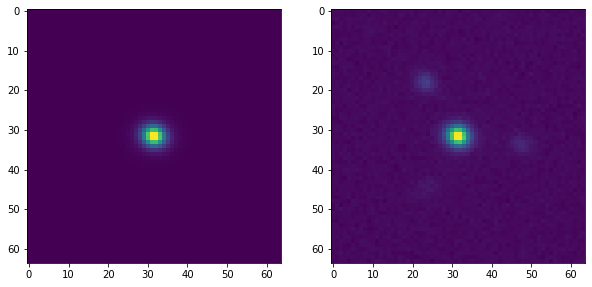

In [16]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

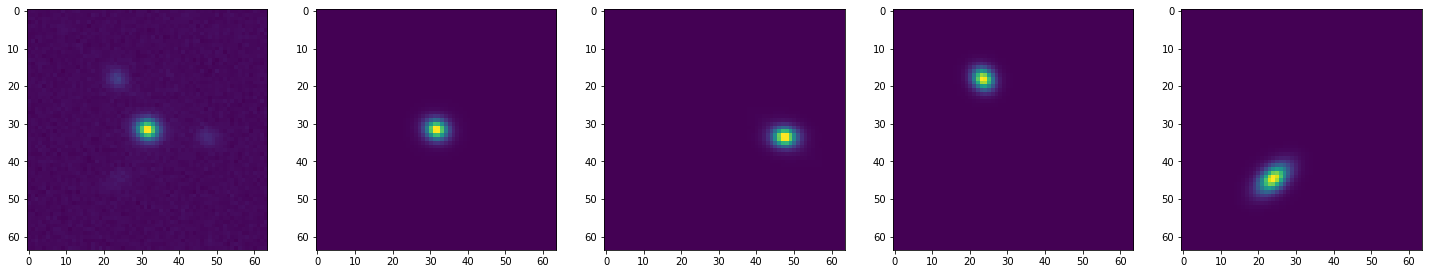

In [17]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Now if I change "training_or_test" into "training" (or validation), only the individual image of the first (and brightest is asked) galaxy added is created.

In [18]:
training_or_test = 'training' # training test validation

In [19]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [20]:
res[0].shape

(10, 64, 64)

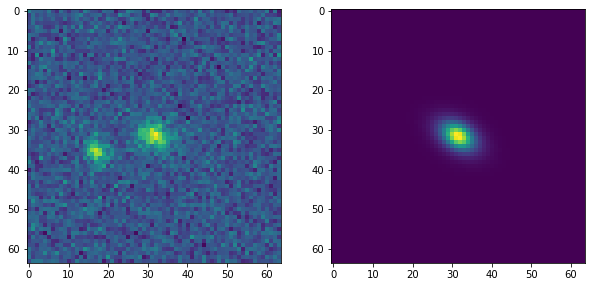

In [21]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[1][6])
ax[1].imshow(res[0][6])

# Image generation using real galaxy images (brightest not centered)

A small correlated noise is observed on these 'denoised' real images. 
A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071


Important: If the parameter `center_brightest` is set to `False`, the brightest galaxy is not centered any more but also the first parameters at rank 0 in the data do not refer to the brightest galaxy any more. It is the case when `center_brightest` is set to `True`.

## Generate image of isolated galaxies

In [22]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [23]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [24]:
res[2]

{'mag_0': 25.138215849004517,
 'redshift_0': 0.0,
 'moment_sigma_0': 1.9849308729171753,
 'e1_0': 0.10885528475046158,
 'e2_0': -0.21226797997951508,
 'nb_blended_gal': 1,
 'mag': 25.138215849004517,
 'mag_ir': -4.320728468053884,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 0.0,
 'SNR_peak': 0.0}

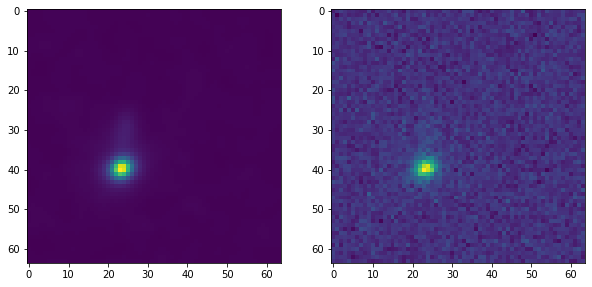

In [25]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [26]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [27]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [28]:
res[2]

{'mag_0': 25.34895954840933,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.9908487796783447,
 'e1_0': -0.09403210878372192,
 'e2_0': 0.015952439978718758,
 'mag_1': 25.957078461001863,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.6505532264709473,
 'e1_1': -0.401925265789032,
 'e2_1': -0.18654939532279968,
 'mag_2': 24.873924124843207,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.112344741821289,
 'e1_2': -0.04259102791547775,
 'e2_2': 0.08180486410856247,
 'mag_3': 24.925236465708384,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.320984363555908,
 'e1_3': -0.03136890009045601,
 'e2_3': -0.1311086267232895,
 'mag_4': 25.098231506084755,
 'redshift_4': 0.0,
 'moment_sigma_4': 2.1059417724609375,
 'e1_4': -0.08558186888694763,
 'e2_4': -0.022100873291492462,
 'mag_5': 24.102389340944697,
 'redshift_5': 0.0,
 'moment_sigma_5': 2.392772912979126,
 'e1_5': -0.29736456274986267,
 'e2_5': 0.2853597104549408,
 'nb_blended_gal': 6,
 'mag': 24.102389340944697,
 'mag_ir': -3.1757270134054236,
 'closest_mag': 24.87

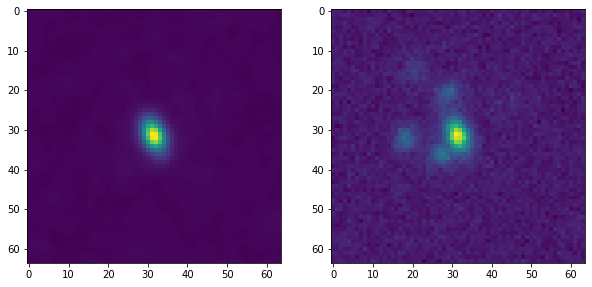

In [29]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

Now display all noiseless galaxy images

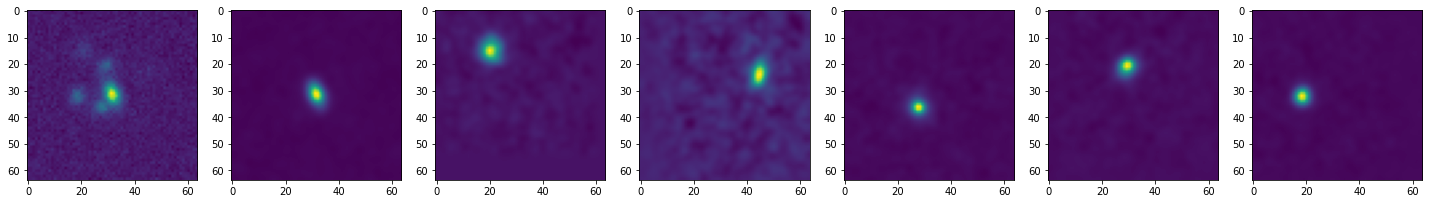

In [30]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Test generating a "validation" dataset

In [31]:
training_or_test = 'validation' # training test validation

In [32]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [33]:
res[0].shape

(10, 64, 64)

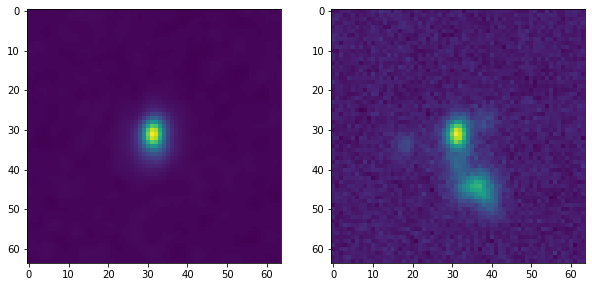

In [34]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 32 and 96 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [35]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

## With simulations

In [36]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [37]:
res[2]

{'e1_fit_0': -0.48087525755756816,
 'e2_fit_0': 0.7139880792472346,
 'weight_fit_0': 424.241593854066,
 'e1_fit_1': -0.14822499930271377,
 'e2_fit_1': 0.7537774393492479,
 'weight_fit_1': 322.52141430581526,
 'e1_fit_2': -0.3594378092140588,
 'e2_fit_2': -0.015204405910526101,
 'weight_fit_2': 476.9985180723084,
 'e1_fit_3': -0.1024632983244321,
 'e2_fit_3': 0.073689546088536,
 'weight_fit_3': 403.1700744124625,
 'e1_fit_4': -0.1790347493085124,
 'e2_fit_4': -0.2089025700506167,
 'weight_fit_4': 515.8194849189217,
 'e1_fit_5': 0.018808862528140565,
 'e2_fit_5': -0.7515582554219049,
 'weight_fit_5': 450.8500736092754,
 'e1_fit_6': 0.06488287580848626,
 'e2_fit_6': 0.2904413136907925,
 'weight_fit_6': 369.6021842302848,
 'e1_fit_7': 0.45314167169330943,
 'e2_fit_7': -0.35297446578228125,
 'weight_fit_7': 496.8619018287604,
 'e1_fit_8': 0.0505381895285468,
 'e2_fit_8': 0.10050349018571013,
 'weight_fit_8': 276.93238407023944,
 'e1_fit_9': -0.13607443499465444,
 'e2_fit_9': -0.539625748941

In [38]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

49 galaxies are added to this image.


Here `res[0]` is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter `center_brightest` to `False`.

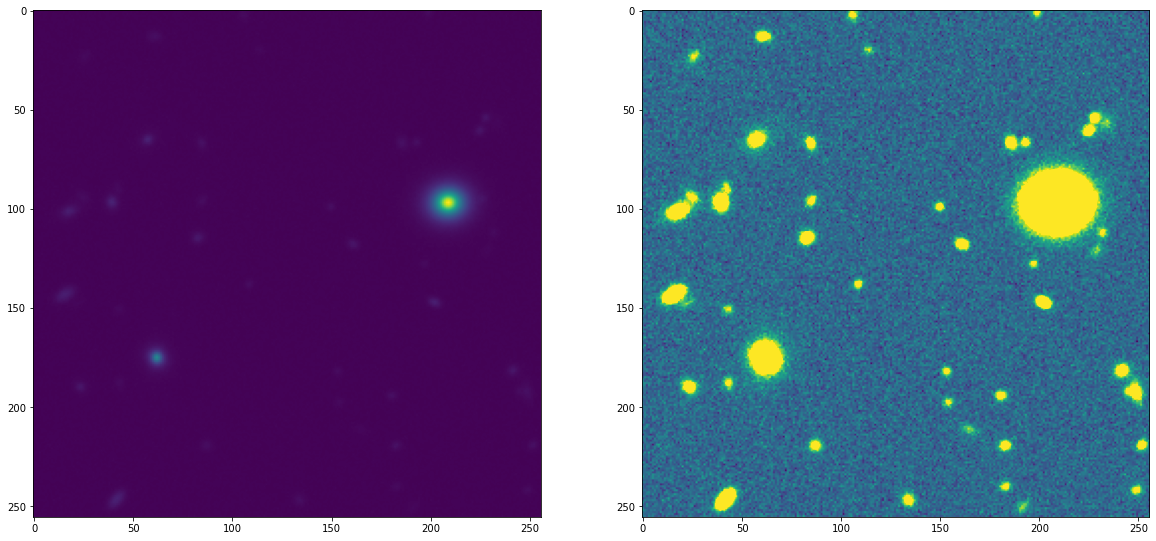

In [39]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the `plot_rgb` function of the `plot.py` module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


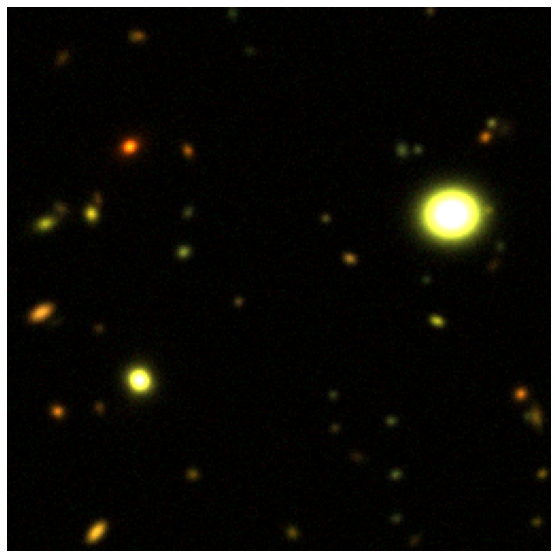

In [40]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


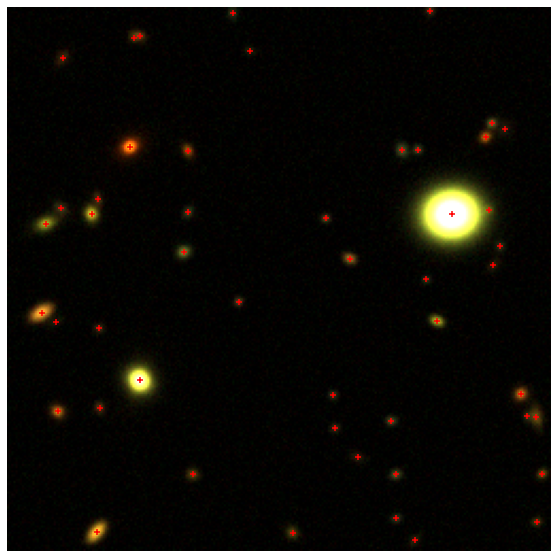

In [41]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [42]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 24. # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [43]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [44]:
res[2]

{'mag_0': 22.524639715508386,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.0993077754974365,
 'e1_0': -0.22156326472759247,
 'e2_0': -0.3702700734138489,
 'mag_1': 22.978444791703893,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.309152126312256,
 'e1_1': -0.10168298333883286,
 'e2_1': -0.1430569291114807,
 'mag_2': 23.262811196406037,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.4202685356140137,
 'e1_2': -0.3591134548187256,
 'e2_2': -0.5979963541030884,
 'mag_3': 23.962460499954098,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.3212015628814697,
 'e1_3': 0.08766701817512512,
 'e2_3': 0.13426242768764496,
 'mag_4': 21.921032668959974,
 'redshift_4': 0.0,
 'moment_sigma_4': 2.20600962638855,
 'e1_4': 0.3069189488887787,
 'e2_4': -0.020959701389074326,
 'mag_5': 23.372999587590733,
 'redshift_5': 0.0,
 'moment_sigma_5': 3.798912286758423,
 'e1_5': 0.41957369446754456,
 'e2_5': 0.9421783089637756,
 'mag_6': 20.509110919301925,
 'redshift_6': 0.0,
 'moment_sigma_6': 2.575409173965454,
 'e1_6': 0.435204595

In [45]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

59 galaxies are added to this image.


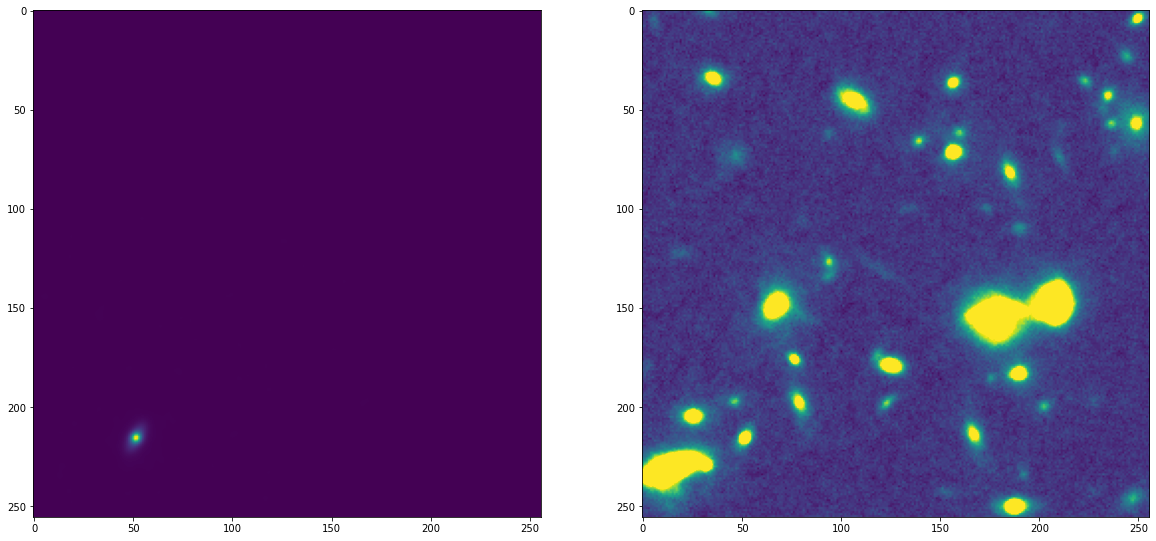

In [46]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6], vmax = 10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


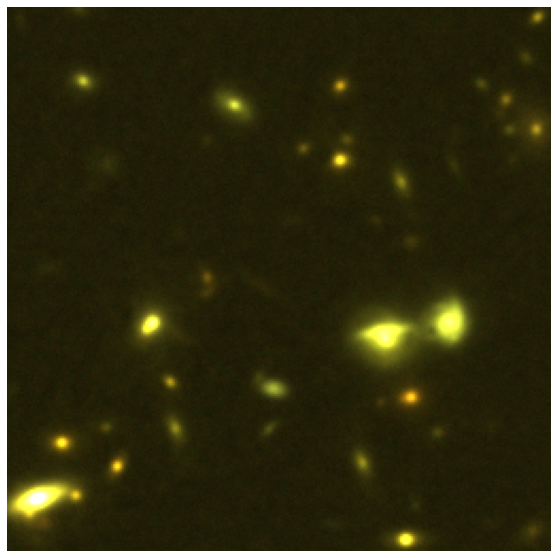

In [47]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


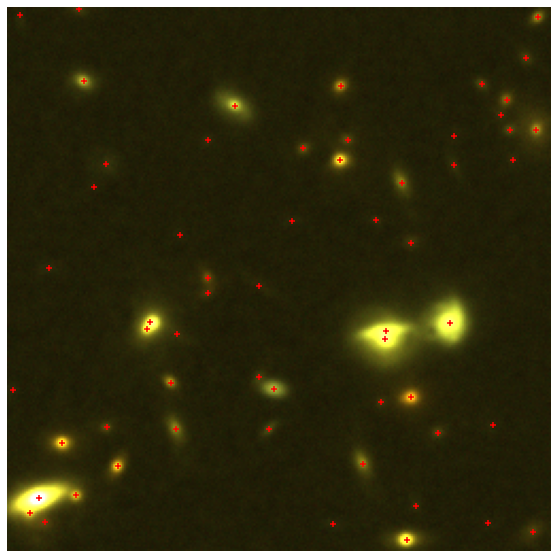

In [48]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)